In [1]:
import pandas as pd
import pandas_gbq
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

pull = '''WITH data AS (
SELECT 
  *,
  DATE_TRUNC(date, WEEK(Sunday)) AS weekStart
FROM 
  `chess-371023.chessPuzzles.puzzlesClean`
)

SELECT
  weekStart,
  SUM(score) AS score,
  COUNT(*) AS puzzles,
  ROUND(SUM(score)/COUNT(*)*100,2) AS pct,
  round(ifnull(100 * (ROUND(SUM(score)/COUNT(*)*100,2)/lag(ROUND(SUM(score)/COUNT(*)*100,2)) over(ORDER BY weekStart) - 1), 0), 2) AS pct_chg
FROM 
  data
GROUP BY
  weekStart
ORDER BY
  weekStart'''


In [3]:
data = pd.read_gbq(query=pull,project_id='chess-371023')

data

,weekStart,score,puzzles,pct,pct_chg
0,2022-12-04,4.5,10,45.00,0.00
1,2022-12-11,28.0,50,56.00,24.44
2,2022-12-18,37.5,60,62.50,11.61
3,2022-12-25,4.0,15,26.67,-57.33


In [4]:
weeklyScore = data

weeklyScore['pct'] = round(weeklyScore['score']/weeklyScore['puzzles'],2)*100

weeklyScore

,weekStart,score,puzzles,pct,pct_chg
0,2022-12-04,4.5,10,45.0,0.00
1,2022-12-11,28.0,50,56.0,24.44
2,2022-12-18,37.5,60,62.0,11.61
3,2022-12-25,4.0,15,27.0,-57.33


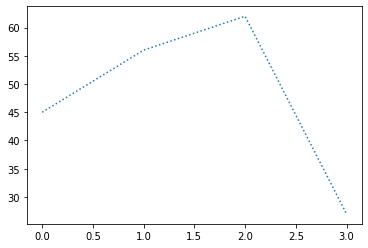

In [5]:
plt.plot(weeklyScore['pct'], linestyle = 'dotted')
plt.show()

In [6]:
fig = px.line(weeklyScore, x="weekStart", y="pct")
fig.show()